<a href="https://colab.research.google.com/github/Saptasindhu07/Clustering-Techniques/blob/main/Customer_Segmentation_Techniques.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
data=pd.read_csv('/content/drive/MyDrive/ML Datasets/customer_segmentation_data.csv')
data

,Annual_Spending,Purchase_Frequency
0,12.34,15
1,13.67,18
2,11.89,16
3,14.23,17
4,12.78,14
...,...,...
355,34.67,31
356,33.23,30
357,35.12,32
358,32.78,29


In [ ]:
data.isnull().sum()

,0
Annual_Spending,0
Purchase_Frequency,0


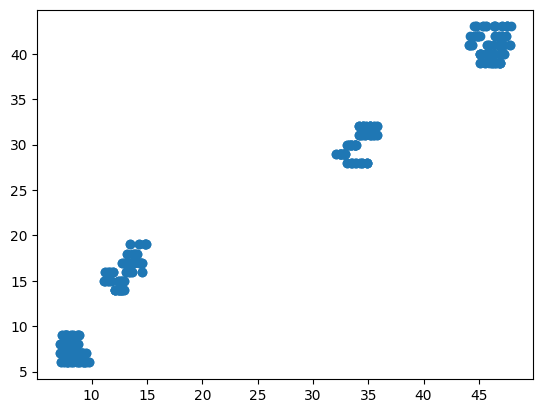

In [ ]:
plt.scatter(data.iloc[:,0],data.iloc[:,1])

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(data.iloc[:,0:2],data.iloc[:,1],test_size=0.2)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

# **Elbow Method**

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmeans.fit(X_train)
    wcss.append(kmeans.inertia_) #inertia is nothing but the wcss value for this particular k value
wcss

[576.0000000000003,
 70.73743778159205,
 24.289275054125923,
 4.3497273941573305,
 3.399511827593451,
 2.5838591459374722,
 1.952193273533964,
 1.5046533610826038,
 1.3238776390581093,
 1.2372079864250067]

**We can see that the steep gradient stops before the fourth point. This means it is our desired k-value**

In [ ]:
k=4
kmeans=KMeans(n_clusters=4,init='k-means++', random_state=42)
kmeans.fit(X_train)

KMeans(n_clusters=4, random_state=42)

In [ ]:
y_pred=kmeans.predict(X_test)
y_pred

array([1, 2, 2, 3, 2, 0, 2, 3, 0, 2, 2, 0, 3, 0, 3, 0, 3, 2, 1, 3, 0, 2,
       2, 0, 2, 0, 1, 3, 3, 1, 0, 3, 3, 0, 3, 1, 2, 2, 0, 0, 2, 2, 2, 2,
       3, 0, 3, 0, 0, 3, 1, 1, 2, 3, 3, 1, 0, 0, 1, 1, 3, 1, 2, 3, 1, 3,
       0, 2, 3, 2, 1, 2], dtype=int32)

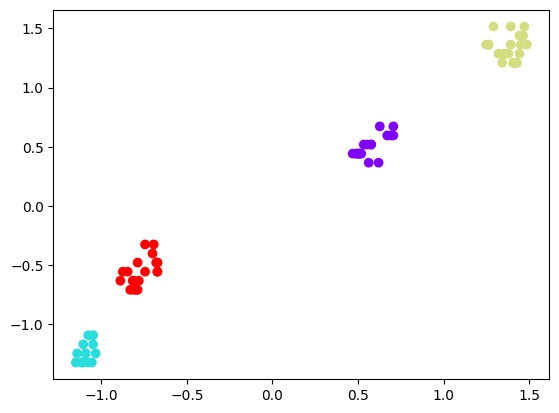

In [ ]:
plt.scatter(X_test[:,0],X_test[:,1],c=y_pred,cmap='rainbow')


# **See how beautifully clustered the points become**

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


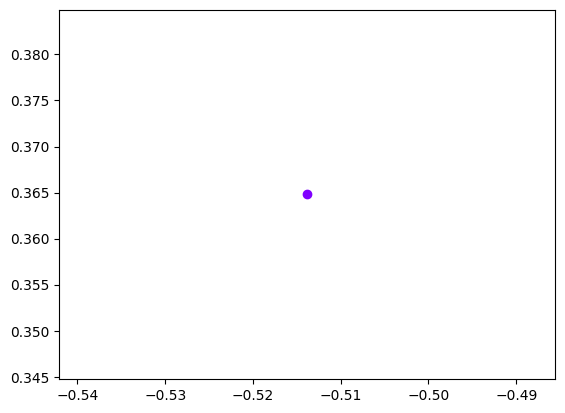

In [ ]:
new_X=scaler.transform([[17,28]])
new_pred= kmeans.predict(scaler.transform([[17,28]]))
plt.scatter(new_X[0][0],new_X[0][1],c=new_pred,cmap='rainbow')

**Notice how the ml algo identified the point as belonging to the third cluster**